# Исследование поведения пользователей сайта

## Постановка задачи исследования

### Исходная информация:
данные о посещениях сайта и заказах пользователей за определенный период, статистика рекламных расходов.
### Цель работы:
исследование поведения пользователей: как пользуются продуктом, когда начинают покупать, сколько денег приносит каждый клиент, когда клиент окупается.

## Этапы исследования:


[1 Подготовка данных в анализу](#1)

[2 Изучение пользовательской активности](#2)

[3 Определение количественных и временных характеристик сессий](#3)

[4 Определение уровня удержания посетителей](#4)

[5 Исследование покупательской активности](#5)

[6 Анализ выручки, затрат и их окупаемости по источникам](#6)

[7 Анализ выручки, затрат и их окупаемости по периодам](#7)

[8 Заключительные выводы и рекомендации](#8)


## Подготовка данных в анализу <a name="1"></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
import seaborn as sns

In [6]:
visits = pd.read_csv('C:/Users/olesy/Downloads/visits_log.csv')

In [7]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [9]:
visits.columns = [col.lower().replace(' ','_') for col in visits.columns]

In [10]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
len(visits[visits.duplicated(keep=False)])

0

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [13]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [14]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [15]:
visits['start_ts'].min(), visits['start_ts'].max()

(Timestamp('2017-06-01 00:01:00'), Timestamp('2018-05-31 23:59:00'))

В исходных данных имеется информация о 359400 посещениях сайта за период с 01.06.2017 г. по 31.05.2018 г. Для каждого посещения известны уникальный идентификатор пользователя, категория его устройства, дата и время начала и окончания сессии, идентификатор рекламного источника, с которого был осуществлен переход на сайт.

In [16]:
orders = pd.read_csv('C:/Users/olesy/Downloads/orders_log.csv')

In [17]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [18]:
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]

In [19]:
len(orders[orders.duplicated(keep=False)])

0

In [20]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [22]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [23]:
orders['buy_ts'].min(), orders['buy_ts'].max()

(Timestamp('2017-06-01 00:10:00'), Timestamp('2018-06-01 00:02:00'))

В данных о заказах за период с 01.06.2017 г. по 01.06.2018 г. имеется информация  о 50415 заказах с уникальным идентификатором пользователя, датой и полученной сайтом выручкой с данного заказа.

In [24]:
costs = pd.read_csv('C:/Users/olesy/Downloads/costs.csv')

In [25]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [26]:
len(costs[costs.duplicated(keep=False)])

0

In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [28]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [29]:
costs['dt'].min(), costs['dt'].max()

(Timestamp('2017-06-01 00:00:00'), Timestamp('2018-05-31 00:00:00'))

Также имеются данные о рекламных источниках с датами и размером понесенных на данный источник затрат за период с 01.06.2017 г. по 31.05.2020 г.

В исходных данных по посещениям сайта, оформленным заказам и понесенным затратам на рекламные источники задвоенных наблюдений выявлено не было, временные признаки приведены к соотвутствующему типу даты.

## Изучение пользовательской активности <a name="2"></a>

In [30]:
visits['visits_date'] = pd.to_datetime(visits['start_ts'].dt.date)

In [31]:
visits['visits_week'] = visits['start_ts'].dt.week

In [32]:
visits['visits_month'] = visits['start_ts'].dt.month

In [33]:
visits['visits_year'] = visits['start_ts'].dt.year

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


In [35]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   device        359400 non-null  object        
 1   end_ts        359400 non-null  datetime64[ns]
 2   source_id     359400 non-null  int64         
 3   start_ts      359400 non-null  datetime64[ns]
 4   uid           359400 non-null  uint64        
 5   visits_date   359400 non-null  datetime64[ns]
 6   visits_week   359400 non-null  int64         
 7   visits_month  359400 non-null  int64         
 8   visits_year   359400 non-null  int64         
dtypes: datetime64[ns](3), int64(4), object(1), uint64(1)
memory usage: 24.7+ MB


### Активность уникальных пользователей за день

In [36]:
dau_total = visits[['device', 'visits_date', 'uid']].groupby(['visits_date', 'device']).agg({'uid' : 'nunique'}).reset_index()

In [37]:
dau_total.columns = ['visits_date', 'device', 'dau_count']

In [38]:
dau_total.head()

,visits_date,device,dau_count
0,2017-06-01,desktop,455
1,2017-06-01,touch,153
2,2017-06-02,desktop,458
3,2017-06-02,touch,152
4,2017-06-03,desktop,307


In [39]:
int(dau_total.groupby('visits_date')['dau_count'].sum().mean())

911

В среднем, на сайт заходит чуть более 900 уникальных пользователей в день.

In [40]:
dau_total['device'].unique()

array(['desktop', 'touch'], dtype=object)

In [41]:
dau_desktop = dau_total.query('"desktop" in device').reindex()

In [42]:
dau_touch = dau_total.query('"touch" in device').reindex()

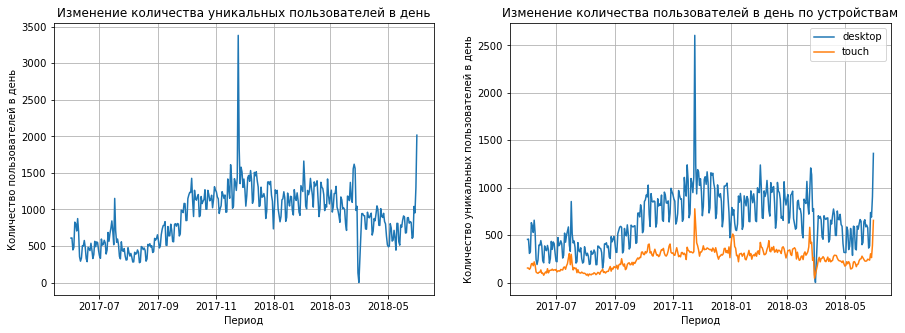

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(dau_total.groupby('visits_date')['dau_count'].sum())
ax1.set_title('Изменение количества уникальных пользователей в день')
ax1.set_xlabel('Период')
ax1.set_ylabel('Количество пользователей в день')
ax1.grid(True)

ax2.plot(dau_desktop.groupby('visits_date')['dau_count'].mean(), label='desktop')
ax2.plot(dau_touch.groupby('visits_date')['dau_count'].sum(), label='touch')
ax2.set_title('Изменение количества пользователей в день по устройствам')
ax2.set_xlabel('Период')
ax2.set_ylabel('Количество уникальных пользователей в день')
ax2.grid(True)
ax2.legend()

plt.show();

С августа 2017 г. количество посещений уникальными пользователями сайта в день возрастало. Пик активности пришелся на конец 2017 г., самый худший показатель по числу посещений сайта в день наблюдается в апреле 2018 г. К середине 2018 г. посещаемость сайта в день постепенно снижается.

За рассматриваемый период пользователи чаще заходили на сайт со стационарных компьютеров (возможно, для них разработан более удобный формайт сайта), чем с других гаджетов. В свою очередь кардинальных отличий в росте/снижении посещаемости сайта с разных устройств не наблюдается. Поэтому вдальнейшем исследование будет опираться на общие данные посещаемости без разбивки по типу устройств, с которых был осуществлен вход на сайт.

### Активность пользователей в неделю

In [44]:
wau_total_date = visits.groupby([visits['start_ts'].astype('datetime64[W]'), 'device']).agg({'uid' : 'nunique'}).reset_index()

In [45]:
wau_total_date.columns = ['visits_week_date', 'device', 'wau_count']

In [46]:
wau_total = visits.groupby(['visits_year', 'visits_week', 'device'])['uid'].nunique().reset_index()

In [47]:
wau_total.columns = ['visits_year','visits_week', 'device', 'wau_count']

In [48]:
int(wau_total_date.groupby(['visits_week_date'])['wau_count'].sum().mean())

5773

В среднем в неделю на сайт заходит чуть меньше 6000 уникальных пользователей.

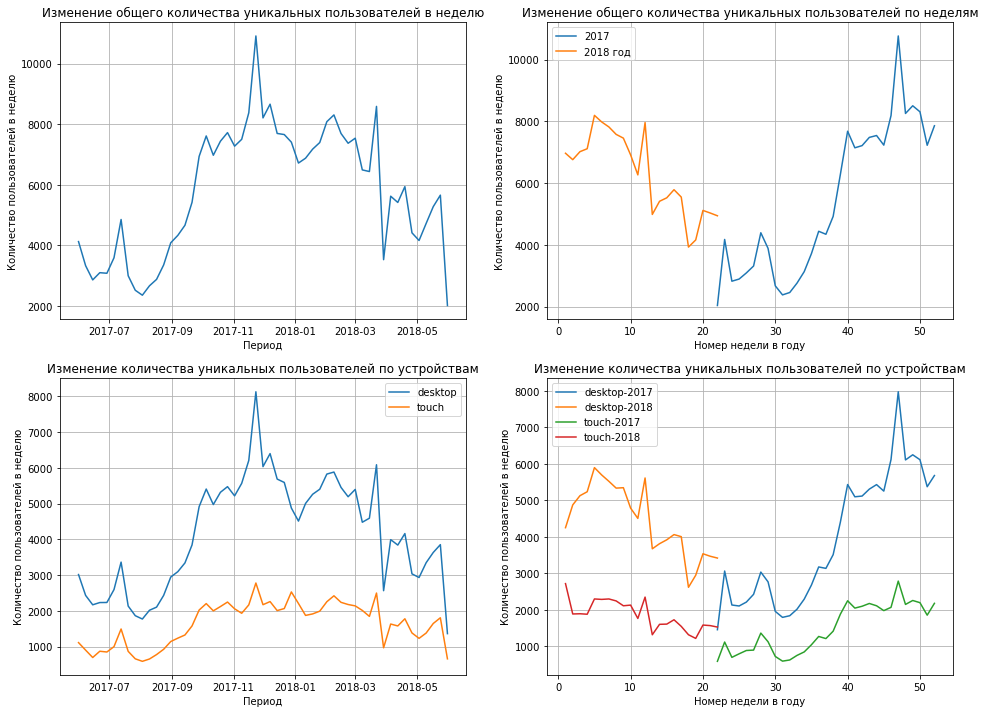

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0][0].plot(wau_total_date.groupby(['visits_week_date'])['wau_count'].sum())
ax[0][0].set_title('Изменение общего количества уникальных пользователей в неделю')
ax[0][0].set_xlabel('Период')
ax[0][0].set_ylabel('Количество пользователей в неделю')
ax[0][0].grid(True)

ax[1][0].plot(wau_total_date.query('"desktop" in device').groupby(['visits_week_date'])['wau_count'].mean(),
              label='desktop')
ax[1][0].plot(wau_total_date.query('"touch" in device').groupby(['visits_week_date'])['wau_count'].sum(), label='touch')
ax[1][0].set_title('Изменение количества уникальных пользователей по устройствам')
ax[1][0].set_xlabel('Период')
ax[1][0].set_ylabel('Количество пользователей в неделю')
ax[1][0].grid(True)
ax[1][0].legend()

ax[0][1].plot(wau_total.query('visits_year == 2017').groupby(['visits_week'])['wau_count'].sum(), label='2017')
ax[0][1].plot(wau_total.query('visits_year == 2018').groupby(['visits_week'])['wau_count'].sum(), label='2018 год')
ax[0][1].set_title('Изменение общего количества уникальных пользователей по неделям')
ax[0][1].set_xlabel('Номер недели в году')
ax[0][1].set_ylabel('Количество пользователей в неделю')
ax[0][1].grid(True)
ax[0][1].legend()

ax[1][1].plot(wau_total.query('"desktop" in device').query('visits_year == 2017')
              .groupby(['visits_week'])['wau_count'].mean(), label='desktop-2017')
ax[1][1].plot(wau_total.query('"desktop" in device').query('visits_year == 2018')
              .groupby(['visits_week'])['wau_count'].mean(), label='desktop-2018')
ax[1][1].plot(wau_total.query('"touch" in device').query('visits_year == 2017')
              .groupby(['visits_week'])['wau_count'].sum(), label='touch-2017')
ax[1][1].plot(wau_total.query('"touch" in device').query('visits_year == 2018')
              .groupby(['visits_week'])['wau_count'].sum(), label='touch-2018')
ax[1][1].set_title('Изменение количества уникальных пользователей по устройствам')
ax[1][1].set_xlabel('Номер недели в году')
ax[1][1].set_ylabel('Количество пользователей в неделю')
ax[1][1].grid(True)
ax[1][1].legend()

plt.show();

Наблюдается активный рост еженедельной активности пользователей с августа 2017 г. вплоть до конца года, после чего число посещений за неделю постепенно падает.

Можно выдвинуть гипотезу, что самая маленькая посешаемость сайта приходится с 20 по 40 недели в году в связи с летним периодом отпусков. Но для подтверждения данного предположения необходимо рассмотреть больший временной период, позволяющий проанализировать по номерам недель данные для разных лет.

Активность посещения пользователями сайта с разных устройств схожа.

### Активность пользователей в месяц

In [50]:
mau_total_date = visits.groupby([visits['start_ts'].astype('datetime64[M]'), 'device']).agg({'uid' : 'nunique'}).reset_index()

In [51]:
mau_total_date.columns = ['visits_month_date', 'device', 'mau_count']

In [52]:
mau_total = visits.groupby(['visits_year', 'visits_month', 'device']).agg({'uid' : 'nunique'}).reset_index()

In [53]:
mau_total.columns = ['visits_year', 'visits_month', 'device', 'mau_count']

In [54]:
mau_total_date.groupby(['visits_month_date'])['mau_count'].sum().reset_index().head()

,visits_month_date,mau_count
0,2017-06-01,13416
1,2017-07-01,14368
2,2017-08-01,11743
3,2017-09-01,19188
4,2017-10-01,30142


In [55]:
int(mau_total_date.groupby('visits_month_date')['mau_count'].sum().mean())

23550

В месяц в среднем на сайт заходит более 23000 уникальных пользователей.

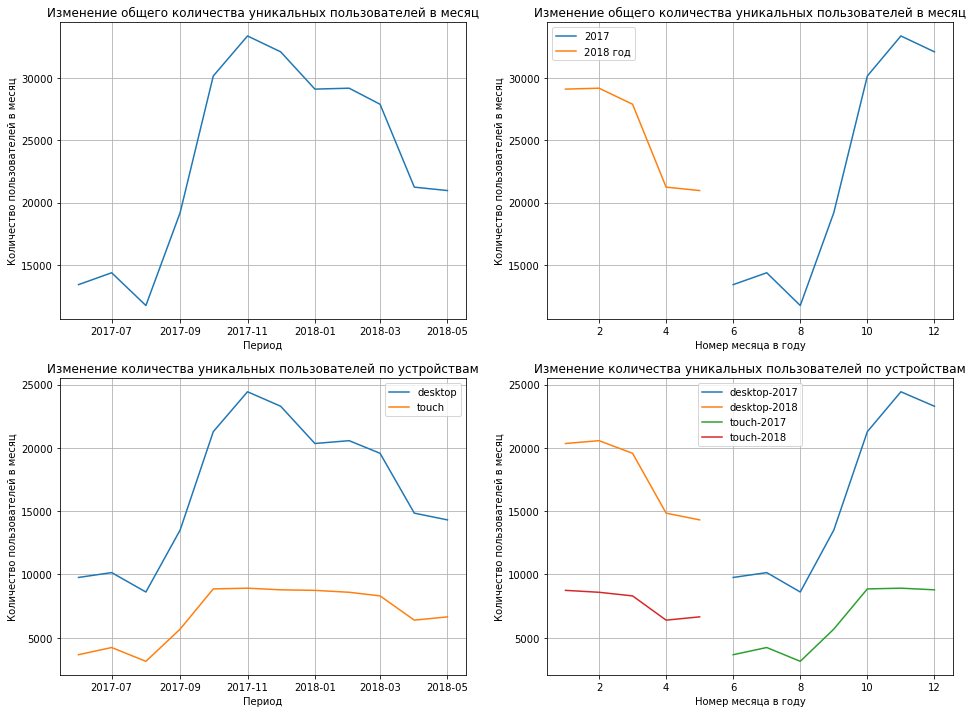

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0][0].plot(mau_total_date.groupby(['visits_month_date'])['mau_count'].sum())
ax[0][0].set_title('Изменение общего количества уникальных пользователей в месяц')
ax[0][0].set_xlabel('Период')
ax[0][0].set_ylabel('Количество пользователей в месяц')
ax[0][0].grid(True)

ax[1][0].plot(mau_total_date.query('"desktop" in device').groupby('visits_month_date')['mau_count'].mean(), label='desktop')
ax[1][0].plot(mau_total_date.query('"touch" in device').groupby('visits_month_date')['mau_count'].sum(), label='touch')
ax[1][0].set_title('Изменение количества уникальных пользователей по устройствам')
ax[1][0].set_xlabel('Период')
ax[1][0].set_ylabel('Количество пользователей в месяц')
ax[1][0].grid(True)
ax[1][0].legend()

ax[0][1].plot(mau_total.query('visits_year == 2017').groupby('visits_month')['mau_count'].sum(), label='2017')
ax[0][1].plot(mau_total.query('visits_year == 2018').groupby('visits_month')['mau_count'].sum(), label='2018 год')
ax[0][1].set_title('Изменение общего количества уникальных пользователей в месяц')
ax[0][1].set_xlabel('Номер месяца в году')
ax[0][1].set_ylabel('Количество пользователей в месяц')
ax[0][1].grid(True)
ax[0][1].legend()

ax[1][1].plot(mau_total.query('"desktop" in device').query('visits_year == 2017')
              .groupby('visits_month')['mau_count'].mean(), label='desktop-2017')
ax[1][1].plot(mau_total.query('"desktop" in device').query('visits_year == 2018')
              .groupby('visits_month')['mau_count'].mean(), label='desktop-2018')
ax[1][1].plot(mau_total.query('"touch" in device').query('visits_year == 2017')
              .groupby('visits_month')['mau_count'].sum(), label='touch-2017')
ax[1][1].plot(mau_total.query('"touch" in device').query('visits_year == 2018')
              .groupby('visits_month')['mau_count'].sum(), label='touch-2018')
ax[1][1].set_title('Изменение количества уникальных пользователей по устройствам')
ax[1][1].set_xlabel('Номер месяца в году')
ax[1][1].set_ylabel('Количество пользователей в месяц')
ax[1][1].grid(True)
ax[1][1].legend()

plt.show();

Анализируя динамику изменения числа посещений уникальными пользователями сайта в месяц, можно сделать вывод, что с августа по ноябрь 2017 г. число посетителей сайта активно росло. После чего стал наблюдаться спад активности пользователей.

Если рассматривать цикличность активности пользователей, можно заключить, что весной и летом посещаемость сайта наиболее низкая (что не противоречит сделанным выводам по цикличности посещаемости в неделю). А осенью вплоть до декабря наблюдается рост активности (что может быть обусловлено желанием посетителей сайта спланировать свой досуг нановогодние каникулы или выбором подарка на Новый год).

Если рассматривать различия в активности пользователей в зависимости от устройства, можно заметить, что с августа 2017 г. посетители с большим перевесом пользовались стационарными компьютерами. Возможно, приложение для других девайсов вызывало трудности. Но с марта 2018 г. соотношение посещений с разных устройств почти вернулось к первоначальному виду, т.к. есть вероятность, что выявленые недочеты были устранены для удобства посетителей сайта.

## Определение количественных и временных характеристик сессий <a name="3"></a>

### Определение количества сессий в день

In [57]:
session_number = pd.pivot_table(visits, index = 'visits_date', columns = 'device', values = 'uid',
                                aggfunc = 'count')

In [58]:
session_number.head()

device,desktop,touch
visits_date,,
2017-06-01,501.0,163.0
2017-06-02,498.0,160.0
2017-06-03,329.0,148.0
2017-06-04,349.0,161.0
2017-06-05,693.0,200.0


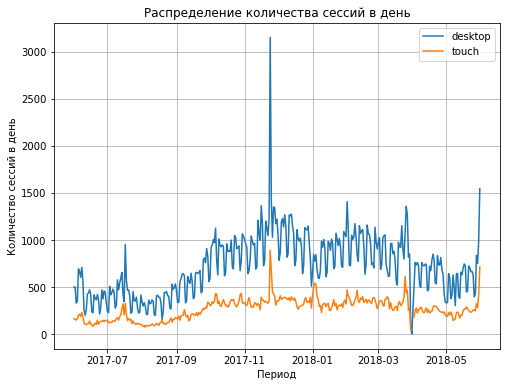

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(session_number['desktop'], label='desktop')
ax.plot(session_number['touch'], label='touch')
ax.set_title('Распределение количества сессий в день')
ax.set_xlabel('Период')
ax.set_ylabel('Количество сессий в день')
ax.grid(True)
ax.legend()

plt.show();

Динамика изменения количества сессий в день по устройствам схожа с динамикой изменения количества уникальных пользователей в день. Это может свидетельствовать о том, что большинство пользователей заходят на сайт не более одного раза.

In [60]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


In [61]:
session_by_source = (visits.groupby(['visits_date', 'source_id']).agg({'uid' :'count'}).groupby('source_id')['uid']
                     .mean().round().astype('int').reset_index()).sort_values(by = 'uid', ascending = False)

In [62]:
session_by_source.columns = ['source_id', 'day_count_mean']

In [63]:
session_by_source.head()

,source_id,day_count_mean
3,4,280
2,3,236
4,5,184
1,2,131
0,1,94


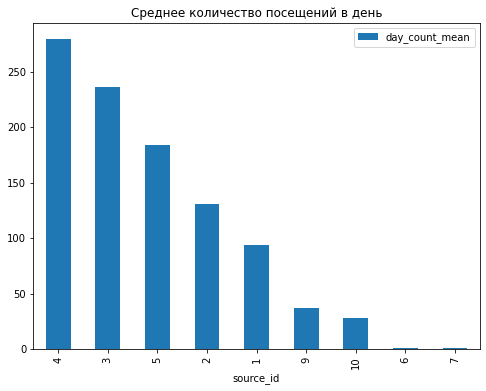

In [64]:
session_by_source.plot.bar(x = 'source_id', y = 'day_count_mean',
                           title = 'Среднее количество посещений в день', figsize = (8,6));

Большая часть посетителей переходит на сайт от рекламных источников под идентификационными номерами "4", "3" и "5" (в среднем более 150 переходов на сайта в день от каждого источника).

### Изучение длительности сессий

In [65]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

In [66]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0


In [67]:
visits['session_duration_m'] = visits['session_duration'] / 60

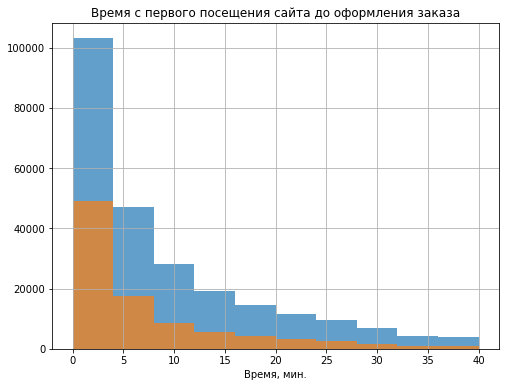

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(visits.query('device == "desktop"')['session_duration_m'], alpha = 0.7, range = (0,40))
ax.hist(visits.query('device == "touch"')['session_duration_m'], alpha = 0.7, range = (0,40))
ax.set_title('Время с первого посещения сайта до оформления заказа')
ax.set_xlabel('Время, мин.')

ax.grid(True)

plt.show();

In [69]:
visits.groupby('device')['session_duration'].median().reset_index()

,device,session_duration
0,desktop,360.0
1,touch,180.0


В среднем сессии длятся до 5 минут. Пользователи, использующие для посещения сайта стационарные компьютеры, в среднем тратят больше время на сессию. Это может быть негативным фактором, если обусловдено неудобным интерфейсом для данного вида устройств. Либо положительным, если большая длительность сессии обусловлена тем, что пользователь тратит время на оформление заказа. Чтобы сделать выводы, необходимо изучить данные заказчиков.

## Определение уровня удержания посетителей  <a name="4"></a>

In [70]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year,session_duration,session_duration_m
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080.0,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680.0,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440.0,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,0.0


*Нахождение даты первой сессии для каждого уникального пользователя*

In [71]:
first_visit = visits.groupby('uid')['start_ts'].min()

In [72]:
first_visit.name = 'first_visit'

In [73]:
visits = visits.join(first_visit, on = 'uid')

In [74]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year,session_duration,session_duration_m,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080.0,18.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680.0,28.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440.0,24.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,0.0,2017-12-27 14:06:00


*Определение lifetime каждой сессии*

In [75]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

In [76]:
visits['lifetime_m'] = ((visits['start_ts'] - visits['first_visit_month']) / np.timedelta64(1,'M')).astype(int)

In [77]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_date,visits_week,visits_month,visits_year,session_duration,session_duration_m,first_visit,first_visit_month,lifetime_m
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080.0,18.0,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680.0,28.0,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0.0,0.0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440.0,24.0,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0.0,0.0,2017-12-27 14:06:00,2017-12-01,0


*Формирование когорт*

In [78]:
cohort = visits.groupby(['first_visit_month', 'lifetime_m']).agg({'uid' : 'nunique'}).reset_index()

In [79]:
cohort.head()

,first_visit_month,lifetime_m,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1030
2,2017-06-01,2,687
3,2017-06-01,3,834
4,2017-06-01,4,899


In [80]:
cohort_size = cohort[cohort['lifetime_m'] == 0][['first_visit_month', 'uid']]

In [81]:
cohort_size = cohort_size.rename(columns = {'uid' : 'cohort_size'})

In [82]:
cohort = cohort.merge(cohort_size, on = 'first_visit_month')

In [83]:
cohort['first_visit_month'] = cohort['first_visit_month'].dt.strftime('%Y-%m')

In [84]:
cohort.head()

,first_visit_month,lifetime_m,uid,cohort_size
0,2017-06,0,13259,13259
1,2017-06,1,1030,13259
2,2017-06,2,687,13259
3,2017-06,3,834,13259
4,2017-06,4,899,13259


In [85]:
cohort['retention'] = cohort['uid'] / cohort['cohort_size']

In [86]:
retention_pivot = cohort.pivot(index = 'first_visit_month', columns = 'lifetime_m', values = 'retention')

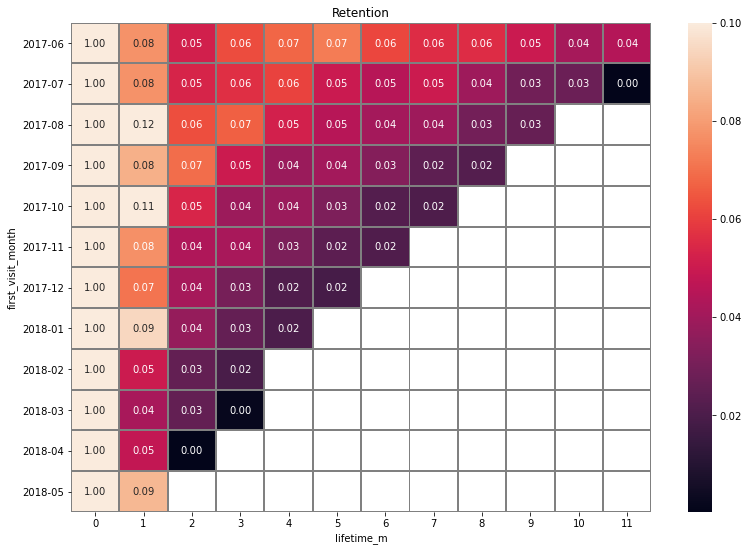

In [87]:
plt.figure(figsize=(13, 9))
plt.title('Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax = 0.1);

Как показал когортный анализ, после первого месяца сессии максимум 12% посетителей возвращаются на сайт в следующем месяце. И не более 4% посетителей сайта становятся постоянными пользователями.

In [88]:
cohort['churn_rate'] = cohort.groupby(['first_visit_month'])['uid'].pct_change() 

In [89]:
churn_pivot = cohort.pivot(index = 'first_visit_month', columns = 'lifetime_m', values = 'churn_rate')

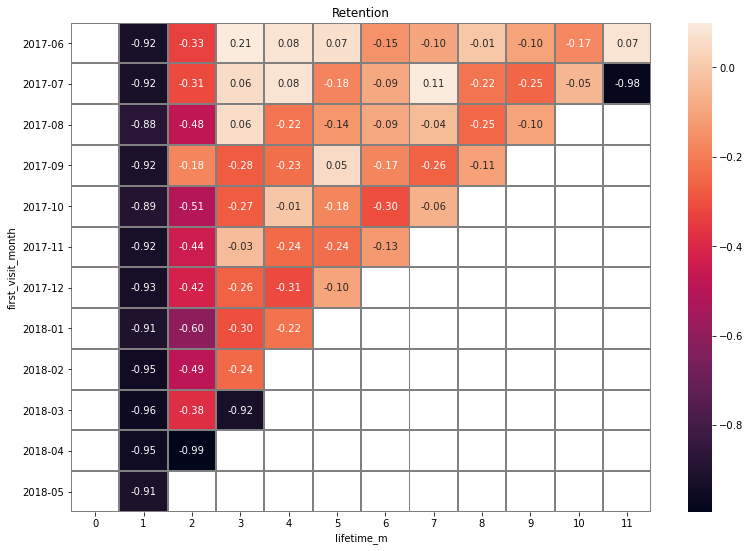

In [90]:
plt.figure(figsize=(13, 9))
plt.title('Retention')
sns.heatmap(churn_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax = 0.1);

Внушительный процент оттока посетителей сайта после первого месяца может объясняться несколькими факторами, такими как незаинтересованность большой части пользователей в предлагаемых услугах сайта после его первого посещения, а также использовании сайта в качестве разовой операции (при возникновении необходимости зашли на сайт, но в следующем месяце уже не возвращаются).

## Исследование покупательской активности <a name="5"></a>

### Определение периода, когда люди начинают покупать

In [91]:
len(orders['uid'].unique()) / len(visits['uid'].unique())

0.16006994815246595

Только 16% посетителей сайта в итоге оформляют заказ.

In [92]:
first_orders = orders.groupby('uid')['buy_ts'].min()

In [93]:
first_orders.name = 'first_order'

In [94]:
first_orders = first_orders.reset_index()
first_visit = first_visit.reset_index()

In [95]:
buy_time = first_orders.merge(first_visit, on = 'uid')

In [96]:
buy_time['buy_time_minute'] = ((buy_time['first_order'] - buy_time['first_visit'])/ np.timedelta64(1,'m'))

In [97]:
buy_time.head()

,uid,first_order,first_visit,buy_time_minute
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


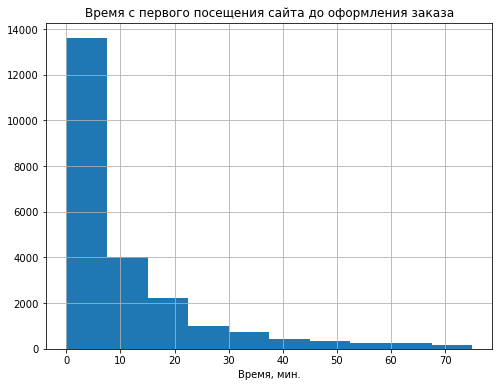

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(buy_time['buy_time_minute'], range = (0,75))
ax.set_title('Время с первого посещения сайта до оформления заказа')
ax.set_xlabel('Время, мин.')
ax.grid(True)

plt.show();

In [99]:
buy_time['buy_time_minute'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: buy_time_minute, dtype: float64

Среди пользователей встречаются те, кто совершил первый заказ спустя почти год после первого посещения сайта. Скорее всего их первый визит на сайт носил ознакомительный, а не целевой характер. Но для большинства покупателей время с момента первого посещения до оформления первого заказа занимает менее получаса.

### Изучение количества покупок за период

In [100]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [101]:
orders = orders[orders['buy_ts'] < '2018-06-01'].copy()

In [102]:
orders['order_day'] = orders['buy_ts'].astype('datetime64[D]')

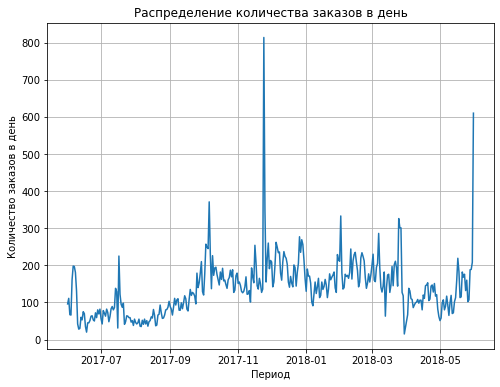

In [103]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(orders.groupby('order_day')['buy_ts'].count())
ax.set_title('Распределение количества заказов в день')
ax.set_xlabel('Период')
ax.set_ylabel('Количество заказов в день')
ax.grid(True)

plt.show();

Как и в динамике изменения количества сессий в день, количество заказов в день достигает максимальное значение к концу 2017 г.

In [104]:
orders['order_week'] = orders['buy_ts'].astype('datetime64[W]')

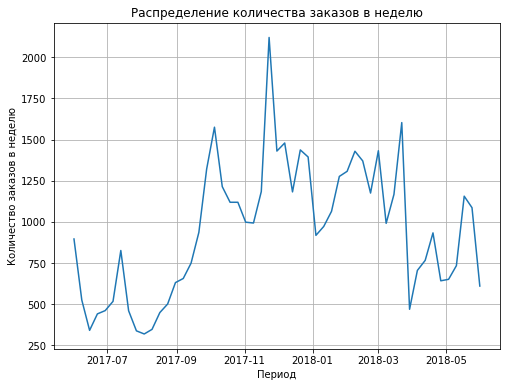

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(orders.groupby(['order_week'])['buy_ts'].count())
ax.set_title('Распределение количества заказов в неделю')
ax.set_xlabel('Период')
ax.set_ylabel('Количество заказов в неделю')
ax.grid(True)

plt.show();

В начале года заказы на сайте не оформлялись активно. К концу 2017 г. наблюдается стремительный рост, после чего частота заказов в неделю снова снижается.

In [106]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

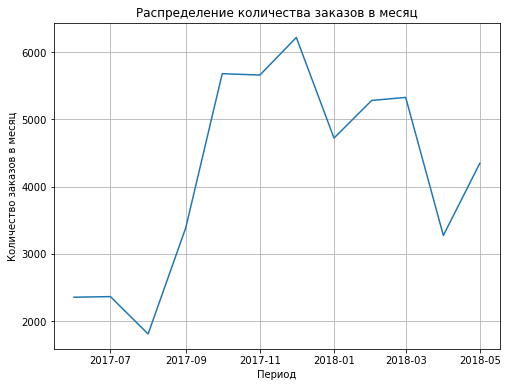

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(orders.groupby(['order_month'])['buy_ts'].count())
ax.set_title('Распределение количества заказов в месяц')
ax.set_xlabel('Период')
ax.set_ylabel('Количество заказов в месяц')
ax.grid(True)

plt.show();

Летом 2017 г. заказов на сайте оформлялось в районе 2000 в месяц, после чего (вплоть до конца года) число заказов стало стремительно расти (возможно, проходили акции, способствующие этому).

In [108]:
orders['uid'].duplicated().mean()

0.27555837664140914

Более 70% покупок являются единичными заказами. Необходимо рассмотреть возмоность привлечения пользователей к повторным покупкам.

### Расчет среднего чека

In [109]:
orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [110]:
check = (orders.groupby('order_month')['revenue'].sum() / orders.groupby('order_month')['uid'].count()).reset_index()

In [111]:
check.columns = ['order_month', 'check_mean']

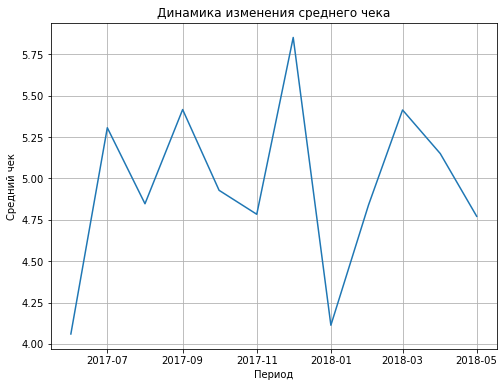

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(orders.groupby('order_month')['revenue'].sum() / orders.groupby('order_month')['uid'].count())
ax.set_title('Динамика изменения среднего чека')
ax.set_xlabel('Период')
ax.set_ylabel('Средний чек')
ax.grid(True)

plt.show();

Средний чек за рассматриваемый период колеблется в диапозоне 4,75 - 5,50. Наибольшее значение среднего чека было достигнуто в декабре 2017 г. (до 5,75), после чего он стреительно упал почти до 4. Это может быть связано с новогодними праздниками.

## Анализ выручки, затрат и их окупаемости по источникам <a name="6"></a>

### Исследование получаемой выручки

#### Определение для каждого источника средней выручки с одного покупателя

*Определение источника пользователя*

Условимся, что нам необходимо узнать рекламный истоник, с которого пользователем был совершен переход на сайт в первый раз. Т.к. благодаря этому источнику посетитель узнал о сайте, а повторные сессии могли совершаться не благодаря другим рекламным ресурсам, а в связи с возникающей у пользователя потребностью. Соответственно, для дальнейшего анализа эффективности источников интересны затраты на те ресурсы, которые привлекают новых посетителей.

In [113]:
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()

In [114]:
sources.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


Создадим таблицу с датой первой покупки (найдена на этапе ранее) и рекламного ресурса, с которого был совершен первый переход на сайт, для каждого покупателя.

In [115]:
payers = first_orders.merge(sources, on = 'uid')

In [116]:
payers.head()

,uid,first_order,source_id
0,313578113262317,2018-01-03 21:51:00,2
1,1575281904278712,2017-06-03 10:13:00,10
2,2429014661409475,2017-10-11 18:33:00,3
3,2464366381792757,2018-01-28 15:54:00,5
4,2551852515556206,2017-11-24 10:14:00,5


In [117]:
payers = payers.rename(columns = {'buy_ts': 'first_order'})

In [118]:
payers['first_order_month'] = payers['first_order'].astype('datetime64[M]').dt.strftime('%Y-%m')

In [119]:
payers.head()

,uid,first_order,source_id,first_order_month
0,313578113262317,2018-01-03 21:51:00,2,2018-01
1,1575281904278712,2017-06-03 10:13:00,10,2017-06
2,2429014661409475,2017-10-11 18:33:00,3,2017-10
3,2464366381792757,2018-01-28 15:54:00,5,2018-01
4,2551852515556206,2017-11-24 10:14:00,5,2017-11


In [120]:
report = payers.merge(orders, on = 'uid')

In [121]:
report['lifetime_m'] = ((report['buy_ts'] - report['first_order']) / np.timedelta64(1, 'M')).round().astype(int)

In [122]:
orders_lifetime_source = report.pivot_table(index = 'source_id', columns = 'lifetime_m',
                                  values = 'revenue', aggfunc = 'count').fillna(0)

In [123]:
orders_lifetime_source

lifetime_m,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,3498.0,284.0,247.0,242.0,189.0,140.0,185.0,137.0,109.0,86.0,62.0,34.0,10.0
2,4380.0,621.0,398.0,283.0,177.0,149.0,105.0,75.0,100.0,41.0,40.0,16.0,7.0
3,11708.0,493.0,331.0,214.0,157.0,111.0,105.0,72.0,48.0,16.0,15.0,8.0,11.0
4,11549.0,341.0,236.0,188.0,167.0,120.0,122.0,63.0,46.0,30.0,18.0,8.0,6.0
5,7956.0,283.0,245.0,196.0,153.0,145.0,142.0,119.0,80.0,60.0,16.0,9.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1272.0,81.0,59.0,69.0,46.0,39.0,34.0,16.0,19.0,9.0,3.0,0.0,0.0
10,1469.0,29.0,13.0,23.0,7.0,2.0,7.0,6.0,4.0,2.0,0.0,0.0,0.0


Покупки, совершенные после перехода из всех рекламных источников, с каждым последующим месяцем сокращаются. Это может быть связано с сокращением числа покупателей или количества совершаемых заказов каждым покупателям.

In [124]:
buyers_lifetime_source = report.pivot_table(index = 'source_id', columns = 'lifetime_m', values = 'uid',
                                  aggfunc = 'nunique').fillna(0)

In [125]:
buyers_lifetime_source

lifetime_m,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,2899.0,110.0,92.0,59.0,57.0,39.0,45.0,33.0,23.0,14.0,15.0,10.0,6.0
2,3506.0,159.0,132.0,99.0,88.0,75.0,55.0,36.0,29.0,17.0,18.0,9.0,5.0
3,10473.0,286.0,227.0,149.0,111.0,86.0,87.0,59.0,45.0,14.0,15.0,8.0,8.0
4,10295.0,272.0,189.0,153.0,110.0,85.0,79.0,40.0,37.0,23.0,12.0,7.0,5.0
5,6931.0,175.0,124.0,79.0,79.0,59.0,47.0,34.0,25.0,19.0,7.0,6.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1088.0,68.0,52.0,45.0,37.0,27.0,23.0,11.0,13.0,8.0,3.0,0.0,0.0
10,1329.0,26.0,12.0,19.0,6.0,2.0,7.0,5.0,4.0,1.0,0.0,0.0,0.0


По всем рекламным источникам число покупателей  с каждым месяцем уменьшается. Это свидетельствует о том, что большинство пользователей переходят на сайт с определенной потребностью, удовлетворив которую, вдальнейшем на него не возвращаются за покупками.

*Рассмотрим накопительную выручку по всем рекламным источникам*

In [126]:
total_revenue_source = report.pivot_table(index = 'source_id', columns = 'lifetime_m',
                                   values = 'revenue', aggfunc = 'sum').fillna(0)

In [127]:
total_revenue_source = total_revenue_source.cumsum(axis = 1)

In [128]:
total_revenue_source

lifetime_m,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,17846.78,20730.27,22876.46,24750.95,26175.95,26818.89,27615.37,28604.02,29544.45,30297.05,30606.37,30942.50,31090.55
2,23737.70,28239.92,34071.03,39455.25,41721.84,43770.27,44601.29,45397.02,46178.78,46396.86,46794.56,46911.76,46923.61
3,46894.89,49529.78,50958.98,52450.34,53235.23,53648.88,53904.56,54183.84,54379.52,54433.18,54487.87,54499.75,54511.24
4,47201.29,48780.35,49955.63,50947.54,52180.44,53809.27,55001.55,55502.57,55701.44,56091.70,56651.63,56679.97,56693.41
5,34030.40,35446.46,37912.39,47385.50,49021.21,50224.35,51048.22,51670.59,52087.36,52511.13,52556.01,52622.25,52624.02
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,4222.42,4534.12,4795.93,5090.63,5209.55,5369.92,5504.33,5577.75,5705.94,5750.05,5759.40,5759.40,5759.40
10,4205.13,4289.26,4325.49,4389.10,4407.73,4411.24,4429.19,4443.31,4446.97,4450.33,4450.33,4450.33,4450.33


In [129]:
cohort_size_source = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})

In [130]:
cohort_size_source.head()

,cohort_size
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931


In [131]:
ltv_source = total_revenue_source.merge(cohort_size_source, on = 'source_id')

In [132]:
ltv_source = ltv_source.div(ltv_source['cohort_size'], axis = 0).drop(columns = 'cohort_size')

In [133]:
ltv_source.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.584430,4.737796,4.851945,4.948285,5.068030,5.226231,5.342031,5.390693,5.410008,5.447912,5.502295,5.505048,5.506353
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558


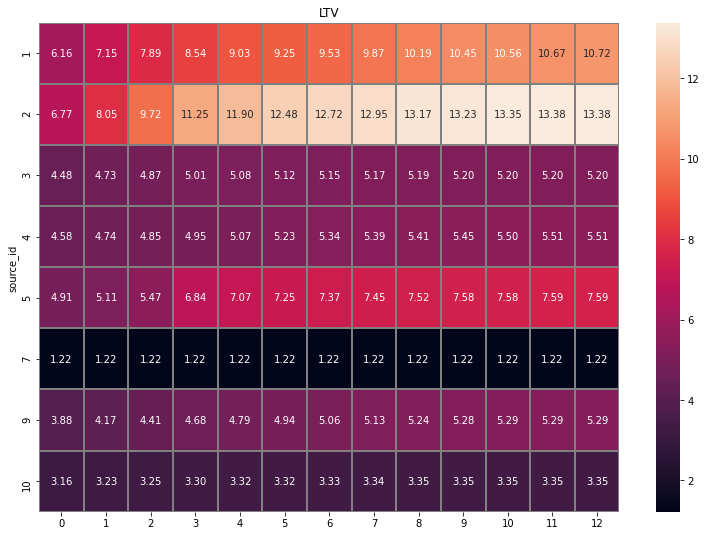

In [134]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Итоговая сумма, которую покупатель, совершившего переход на сайт от рекламного источника "2", приносит в среднем со всех своих покупок равна 13,38, из источника "1" - 10,72, источника "5" - 7,59. Покупатели из остальных источников в среднем приносят 5 и менее со всех своих покупок.

### Исследование и анализ затрат

#### Определение стоимости привлечения покупателя для каждого рекламного источника

In [135]:
costs.groupby('dt').agg({'costs': 'sum'}).reset_index().head()

,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


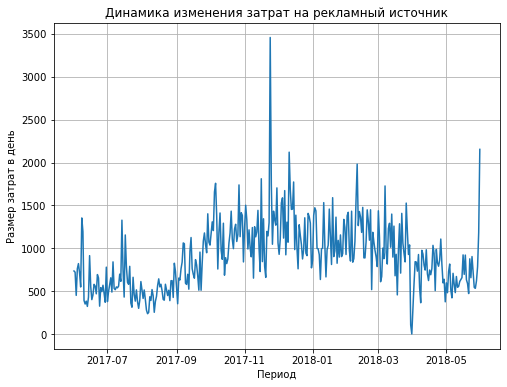

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(costs.groupby('dt').agg({'costs': 'sum'}))
ax.set_title('Динамика изменения затрат на рекламный источник')
ax.set_xlabel('Период')
ax.set_ylabel('Размер затрат в день')
ax.grid(True)

plt.show();

Динамика затрат схожа с динамикой посещаемости сайта и оформленными заказами. Рассмотрим детальнее специфику данных затрат по рекламным источникам.

In [137]:
cac_source = (costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_size_source.reset_index(),
                                                                           left_on = 'source_id', right_on='source_id'))

In [138]:
cac_source['cac'] = cac_source['costs'] / cac_source['cohort_size']

In [139]:
cac_source.head()

,source_id,costs,cohort_size,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479


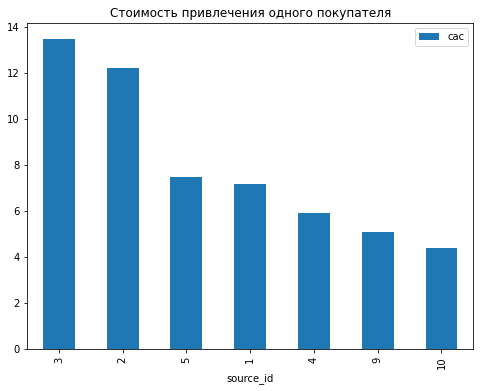

In [140]:
cac_source.sort_values(by = 'cac', ascending = False).plot.bar(x = 'source_id', y = 'cac',
                           title = 'Стоимость привлечения одного покупателя', figsize = (8,6));

Самые большие расходы на привлечение одного покупателя оказались для рекламных источников "3" (почти 14) и "2" (около 8).

### Анализ окупаемости расходов

#### Исследование окупаемости понесенных расходов

In [141]:
cac_source = cac_source.set_index('source_id')

In [142]:
romi_source = ltv_source.merge(cac_source[['cac']], on = 'source_id')

In [143]:
romi_source = romi_source.div(romi_source['cac'], axis = 0).drop(columns = ['cac'])

In [144]:
romi_source.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.856648,0.995056,1.098073,1.188049,1.256449,1.287311,1.325542,1.372997,1.418138,1.454263,1.469110,1.485245,1.492351
2,0.554541,0.659718,0.795940,0.921722,0.974672,1.022526,1.041939,1.060528,1.078791,1.083886,1.093177,1.095915,1.096191
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.772859,0.798714,0.817958,0.834199,0.854386,0.881056,0.900578,0.908782,0.912038,0.918428,0.927596,0.928060,0.928280
5,0.657502,0.684862,0.732506,0.915536,0.947140,0.970386,0.986304,0.998329,1.006381,1.014569,1.015436,1.016716,1.016750


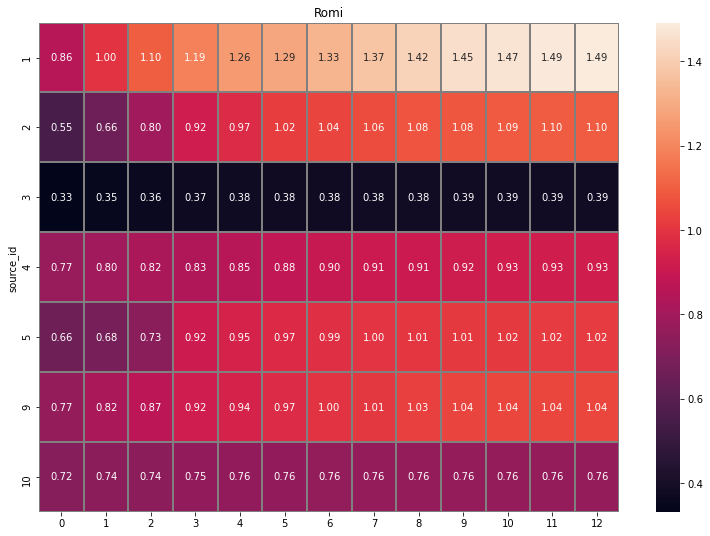

In [145]:
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(romi_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Первыми окупаются понесенные затраты рекламного источника "1" (на третий месяц), источника "2" на 6 месяц, а "9"- на 8 месяц. Затраты на одного пользователя, перешедших на сайт из рекламных источников "3", "10" и "4" не успевают окупиться за 12 месяцев.

### Анализ выручки, затрат и их окупаемости по периодам  <a name="7"></a>

#### Исследование получаемой выручки

In [146]:
orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [147]:
first_orders['first_order_month'] = first_orders['first_order'].astype('datetime64[M]')

In [148]:
orders = pd.merge(orders,first_orders, on='uid')

In [149]:
orders.head()

,buy_ts,revenue,uid,order_day,order_week,order_month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [150]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

In [151]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [152]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [153]:
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [154]:
report_month = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [155]:
report_month.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [156]:
report_month['age'] = (report_month['order_month'] - report_month['first_order_month']) / np.timedelta64(1, 'M')

In [157]:
report_month['age'] = report_month['age'].round().astype('int')

In [158]:
report_month['first_order_month'] = report_month['first_order_month'].dt.strftime('%Y-%m')

In [159]:
report_month.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06,2023,2017-06-01,9557.49,0
1,2017-06,2023,2017-07-01,981.82,1
2,2017-06,2023,2017-08-01,885.34,2
3,2017-06,2023,2017-09-01,1931.30,3
4,2017-06,2023,2017-10-01,2068.58,4


In [160]:
report_month['ltv'] = report_month['revenue'] / report_month['n_buyers']

In [161]:
output = report_month.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

In [162]:
ltv = output.cumsum(axis=1).round(2)

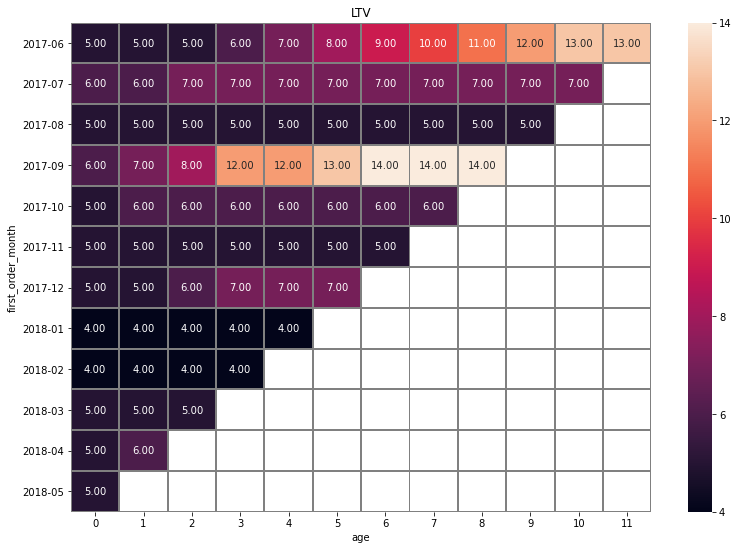

In [163]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Вне зависимости от периода первой покупки, выручка от первого заказа примерно одинаковая. Наибольшая итоговая сумма, которую покупатель приносит в среднем со всех своих покупок, наблюдается в когортах, сформированных в июне и сентябре. Стоит отметить, что в большинстве когорт не наблюдается активного увеличения прибыльности от покупателя. Это может свидетельсвовать о том, что данный сайт чаще используется пользователями для удовлетворения оперативной и чаще единовременной потребности.

#### Исследование и анализ затрат

In [164]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.strftime('%Y-%m')

In [165]:
monthly_costs = costs.groupby('month').sum()

In [166]:
report_new = pd.merge(report_month, monthly_costs, left_on='first_order_month', right_on='month')

In [167]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [168]:
report_new['cac'].describe()

count    78.000000
mean      9.319905
std       0.733719
min       7.437841
25%       8.905091
50%       9.288870
75%       9.485486
max      10.796015
Name: cac, dtype: float64

В оновном размер затрат на привлечение одного пользователя колеблется в пределах 7-9. 

#### Анализ окупаемости расходов

In [169]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [170]:
output = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

In [171]:
romi = output.cumsum(axis=1).round(2)

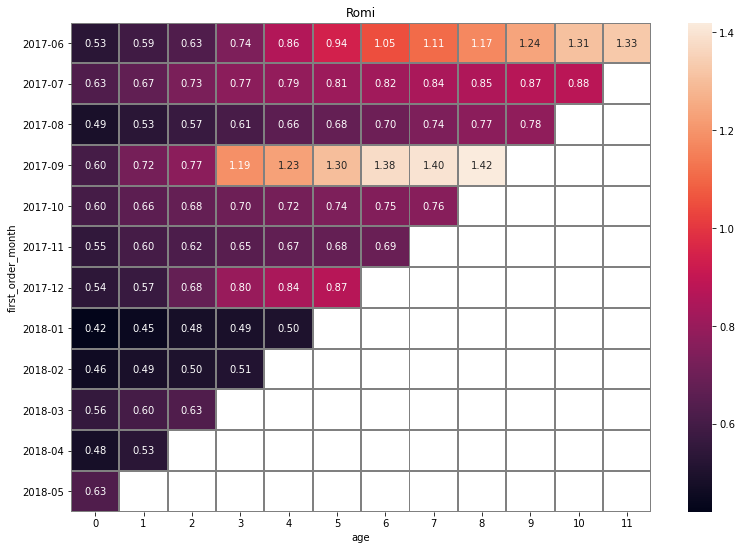

In [172]:
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Окупаемость затрат в общем виде по сформированным когортам наступает не раньше седьмого месяца. Ислючением стала когорта, сформированная в сентябре, затраты на привлечение покупателей которой окупились уже на четвертый месяц, т.е. в декабре.

## Заключительные выводы и рекомендации  <a name="8"></a>

В исходных данных имеется информация о 359400 посещениях сайта за период с 01.06.2017 г. по 31.05.2018 г., о 50415 заказах за период с 01.06.2017 г. по 01.06.2018 г., о рекламных источниках с датами и размером понесенных на данный источник затрат за период с 01.06.2017 г. по 31.05.2020 г.

В среднем, на сайт заходит чуть более 900 уникальных пользователей в день, чуть меньше 6000 пользователей в неделю и более 23000 пользователей в месяц.

Динамика изменения числа посещений уникальными пользователями сайта в месяц показала, что с августа по ноябрь 2017 г. число посетителей сайта активно росло, после чего стал наблюдаться спад активности пользователей.
Если рассматривать цикличность активности пользователей, можно заключить, что весной и летом посещаемость сайта наиболее низкая, а осенью вплоть до декабря наблюдается рост активности.

Кардинальных различий в активности пользователей в зависимости от устройства, с которого был осуществлен переход на сайт, выявлено не было.

В среднем сессии длятся до 5 минут. Большая часть посетителей переходит на сайт от рекламных источников под идентификационными номерами "4", "3" и "5" (в среднем более 150 переходов на сайта в день от каждого источника). Как показал анализ всех источников, после первого месяца сессии максимум 12% посетителей возвращаются на сайт в следующем месяце и не более 4% посетителей сайта становятся постоянными пользователями.

Только 16% посетителей сайта в итоге оформляют заказ. Среди пользователей встречаются те, кто совершил первый заказ спустя почти год после первого посещения сайта. Но для большинства покупателей время с момента первого посещения до оформления первого заказа занимает менее получаса. Средний чек за рассматриваемый период колеблется в диапозоне 4,75 - 5,50.

В среднем, каждый покупатель, который перешел на сайт от рекламного источника "2", за весь исследуемый период принес прибыль в размере 13,38, из источника "1" - 10,72, источника "5" - 7,59. Покупатели из остальных источников приносят прибыль 5 и менее. Самые большие расходы на привлечение одного покупателя оказались для рекламных источников "3" (почти 14) и "2" (около 8). В свою очередь первыми окупаются понесенные затраты рекламного источника "1" (на третий месяц), источника "2" на 6 месяц, а "9"- на 8 месяц. Затраты на одного пользователя, перешедших на сайт из рекламных источников "3", "10" и "4" не успевают окупиться за 12 месяцев.

Вне зависимости от периода первой покупки, выручка от первого заказа примерно одинаковая. Наибольшая итоговая сумма, которую покупатель приносит в среднем со всех своих покупок, наблюдается в когортах, сформированных в июне и сентябре. В оновном размер затрат на привлечение одного пользователя колеблется в пределах 7-9. Окупаемость затрат в общем виде по сформированным когортам наступает не раньше седьмого месяца. Ислючением стала когорта, сформированная в сентябре, затраты на привлечение покупателей которой окупились уже на четвертый месяц, т.е. в декабре.

#### Рекомендации:

* Учитывать, что большая часть посетителей заходит со стационарных компьютеров, но присутствует необходимость развивать сайт для всех гаджетов.

* Иметь ввиду значительный рост активности посещений сайта и оформления заказов в конце года (ноябрь-декабрь) и резкий спад в начале (январь).

* Сконцентрировать внимание на рекламные источники с наиболее быстрой окупаемостью понесенных на них затрат и пересмотреть целесообразность и размер затрат на прочие.